In [38]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from joblib import dump
from sklearn.tree import DecisionTreeClassifier


In [39]:

dataset = pd.read_pickle("clean_data")
print(dataset)


          age  trestbps      chol   thalach   oldpeak  target  sex_0  sex_1  \
0    0.952197  0.763956 -0.256334  0.015443  1.087338       1      0      1   
1   -1.915313 -0.092738  0.072199  1.633471  2.122573       1      0      1   
2   -1.474158 -0.092738 -0.816773  0.977514  0.310912       1      1      0   
3    0.180175 -0.663867 -0.198357  1.239897 -0.206705       1      0      1   
4    0.290464 -0.663867  2.082050  0.583939 -0.379244       1      1      0   
..        ...       ...       ...       ...       ...     ...    ...    ...   
298  0.290464  0.478391 -0.101730 -1.165281 -0.724323       0      1      0   
299 -1.033002 -1.234996  0.342756 -0.771706  0.138373       0      0      1   
300  1.503641  0.706843 -1.029353 -0.378132  2.036303       0      0      1   
301  0.290464 -0.092738 -2.227533 -1.515125  0.138373       0      0      1   
302  0.290464 -0.092738 -0.198357  1.064975 -0.896862       0      1      0   

     cp_0  cp_1  ...  slope_2  ca_0  ca_1  ca_2  ca

In [40]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)



In [41]:

dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))
    
print(max(dt_scores))

0.8241758241758241


Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

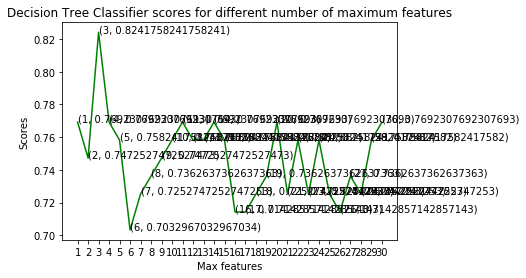

In [42]:

plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [43]:
dt_classifier = DecisionTreeClassifier(max_features = 3, random_state = 0)
dt_classifier.fit(X_train, y_train)
print(dt_classifier.score(X_test,y_test))

0.8241758241758241


In [44]:
dump(dt_classifier, 'decisionTree.jobliz.z')

['decisionTree.jobliz.z']